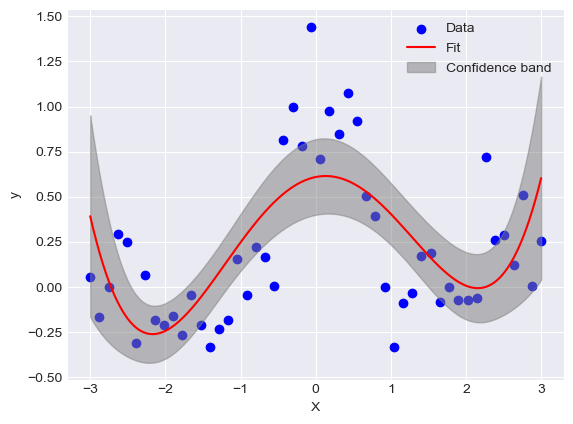

In [16]:

# 导入所需的库
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoLarsCV, BayesianRidge, Ridge
plt.style.use('seaborn-darkgrid')

from scipy.stats import norm
# 生成一些模拟数据
np.random.seed(0)
# X = np.linspace(0, 10, 100).reshape(-1, 1)
X = np.linspace(-3, 3, 50).reshape(-1, 1)
# y = 3 * X + 5 + np.random.normal(0, 1, size=(100, 1))
piX = X*np.pi
y = np.sin(piX) / piX + 0.1*X+0.2*np.random.normal(0, 1, size=(50, 1))


# 定义Bootstrap函数，输入为X，y，模型，重采样次数和置信水平
def bootstrap(X, y, model, B, alpha, X_predict=None):
    if X_predict is None: X_predict =X
    # 初始化一个空列表用于存储每次重采样得到的模型预测值
    predictions = []
    # 对于每次重采样
    for b in range(B):
        # 随机选择X和y中的n个样本（有放回）
        sample_indices = np.random.choice(X.shape[0], size=X.shape[0], replace=True)
        X_sample = X[sample_indices]
        y_sample = y[sample_indices]
        # 拟合模型并得到预测值
        model.fit(X_sample, y_sample)
        y_pred = model.predict(X_predict)
        # 将预测值添加到列表中
        predictions.append(y_pred)
    # 将列表转换为数组，方便计算
    predictions = np.array(predictions)
    # 计算每个X对应的预测值的均值和标准差
    mean_pred = np.mean(predictions, axis=0)
    std_pred = np.std(predictions, axis=0)
    # 计算置信区间的上下界
    lower_bound = mean_pred - norm.ppf(1 - alpha / 2) * std_pred
    upper_bound = mean_pred + norm.ppf(1 - alpha / 2) * std_pred
    # 返回置信区间的上下界和预测值的均值
    return lower_bound, upper_bound, mean_pred

# 使用线性回归模型，重采样1000次，置信水平为95%
# model = LinearRegression()
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
model = make_pipeline(PolynomialFeatures(4), Ridge())
X_predict= np.linspace(-3, 3, 1000).reshape(-1, 1)
lower_bound, upper_bound, mean_pred = bootstrap(X, y, model, 1000, 0.05, X_predict)

# 绘制原始数据点，拟合线和置信带
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X_predict, mean_pred, color='red', label='Fit')
plt.fill_between(X_predict.ravel(), lower_bound.ravel(), upper_bound.ravel(), color='gray', alpha=0.5, label='Confidence band')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.savefig('test.png')

